In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hespress/stories_faits-divers.csv
/kaggle/input/hespress/comments_marocains-du-monde.csv
/kaggle/input/hespress/stories_art-et-culture.csv
/kaggle/input/hespress/comments_regions.csv
/kaggle/input/hespress/comments_orbites.csv
/kaggle/input/hespress/stories_regions.csv
/kaggle/input/hespress/comments_art-et-culture.csv
/kaggle/input/hespress/stories_sport.csv
/kaggle/input/hespress/stories_medias.csv
/kaggle/input/hespress/comments_economie.csv
/kaggle/input/hespress/comments_medias.csv
/kaggle/input/hespress/stories_economie.csv
/kaggle/input/hespress/comments_sport.csv
/kaggle/input/hespress/comments_politique.csv
/kaggle/input/hespress/stories_tamazight.csv
/kaggle/input/hespress/stories_societe.csv
/kaggle/input/hespress/stories_orbites.csv
/kaggle/input/hespress/comments_societe.csv
/kaggle/input/hespress/stories_politique.csv
/kaggle/input/hespress/stories_marocains-du-monde.csv
/kaggle/input/hespress/comments_faits-divers.csv
/kaggle/input/hespress/comments_tamazig

In [3]:
#df = pd.read_csv("../input/hespress/stories_faits-divers.csv")
df = pd.concat(map(pd.read_csv, ["../input/hespress/stories_faits-divers.csv", "../input/hespress/stories_art-et-culture.csv"
                                 ,"../input/hespress/stories_regions.csv" ,"../input/hespress/stories_sport.csv"
                                ,"../input/hespress/stories_medias.csv" ,"../input/hespress/stories_economie.csv"
                                ,"../input/hespress/stories_tamazight.csv" , "../input/hespress/stories_societe.csv"
                                , "../input/hespress/stories_orbites.csv" , "../input/hespress/stories_politique.csv"
                                , "../input/hespress/stories_marocains-du-monde.csv" ]))

df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers


In [4]:
df = df.sample(frac=1)
columns = ["title" , "story" ,"author", "topic"] 
data = df[columns]
data.head()

,title,story,author,topic
148,انتشال جثة ثالثة من ورش عمارة منهارة بمراكش,تمكنت عناصر الوقاية المدنية بمراكش، الخميس، من...,إبراهيم مغراوي من مراكش,faits-divers
933,الـIRCAM يحتفي بثلاث نساء مغربيات,نظم المعهد الملكي للثقافة الأمازيغية، يوم أمس ...,هسبريس - و.م.ع (صورة منير امحيمدات),tamazight
61,"منابر عربية ترصد ""الحزم الملكي"" أمام تفشي ""كور...",حظي خطاب الملك محمد السادس، بمناسبة ثورة الملك...,هسبريس من الرباط,medias
727,مشروع استئناف الدوري على طاولة لقجع .. والقرار...,أنهت اللجنة الجامعية التي أسندت إليها مهمة وضع...,هسبورت - محمد أمين متبار,sport
75,معدّل الرّحلات الجوية واختبارات كورونا وراء غض...,على بُعد يومين على فتحِ الحدود الجوّية للمملكة...,هسبريس من الرباط,marocains-du-monde


In [5]:
print("Duplicated values: " , data.duplicated().sum())

data.drop_duplicates(inplace=True)
data = data.dropna(axis=0)
print(data.info())

Duplicated values:  2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10998 entries, 148 to 795
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10998 non-null  object
 1   story   10998 non-null  object
 2   author  10998 non-null  object
 3   topic   10998 non-null  object
dtypes: object(4)
memory usage: 429.6+ KB
None


/tmp/ipykernel_32/3122987058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [6]:
data["topic"].value_counts()

faits-divers          1000
tamazight             1000
medias                1000
sport                 1000
marocains-du-monde    1000
politique             1000
art-et-culture        1000
societe               1000
orbites               1000
regions                999
economie               999
Name: topic, dtype: int64

# Number of examples per class

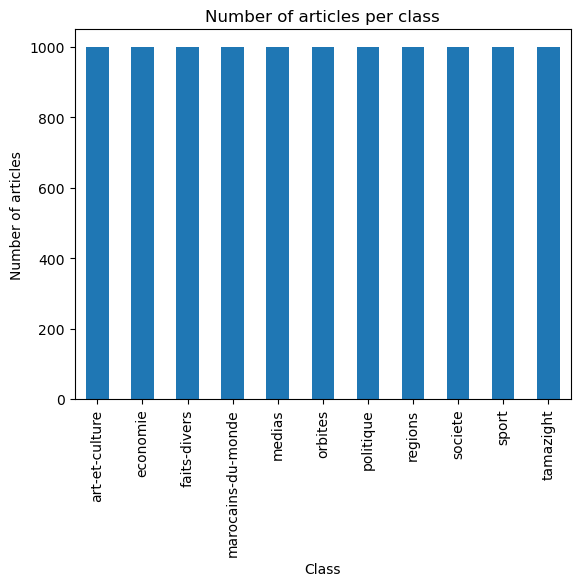

In [7]:
import matplotlib.pyplot as plt
class_counts = data.groupby("topic").size()

# Create a bar chart
class_counts.plot(kind="bar")
plt.title("Number of articles per class")
plt.xlabel("Class")
plt.ylabel("Number of articles")
plt.show()

#  Top frequent n-grams generally and per class

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


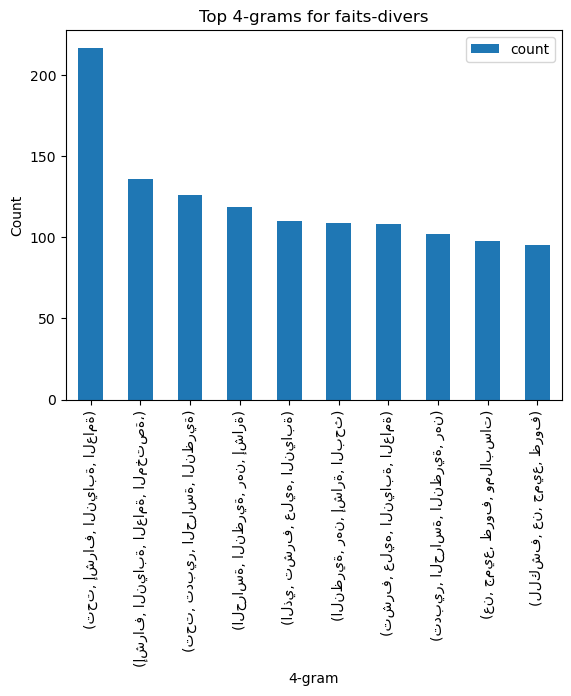

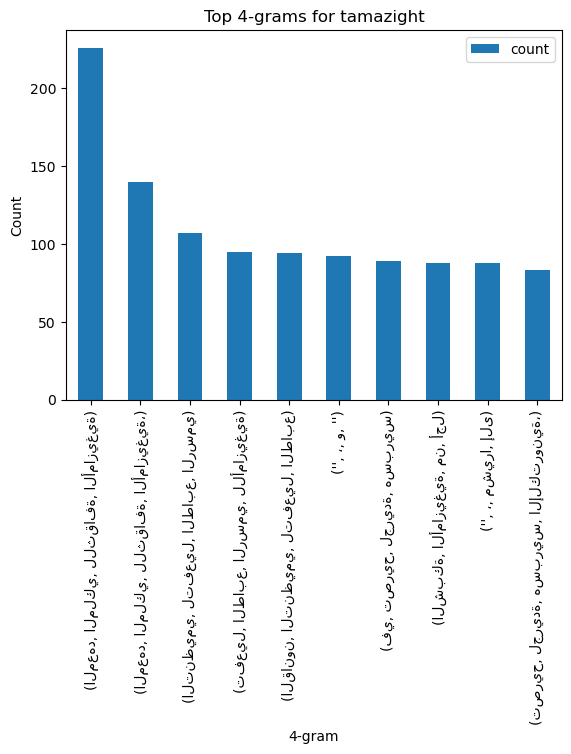

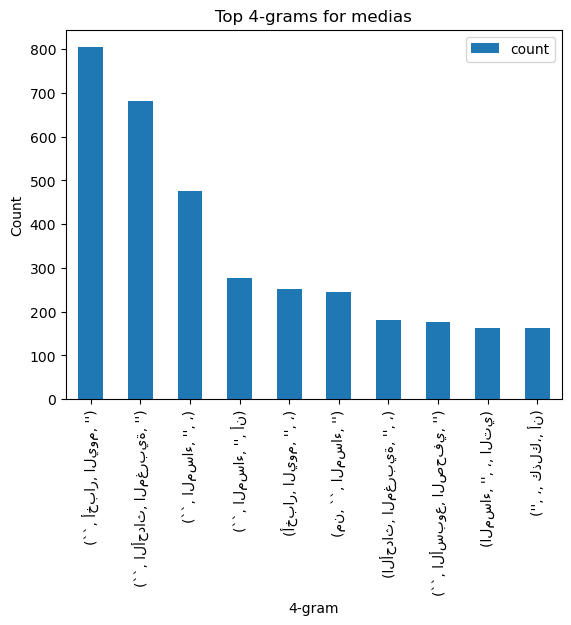

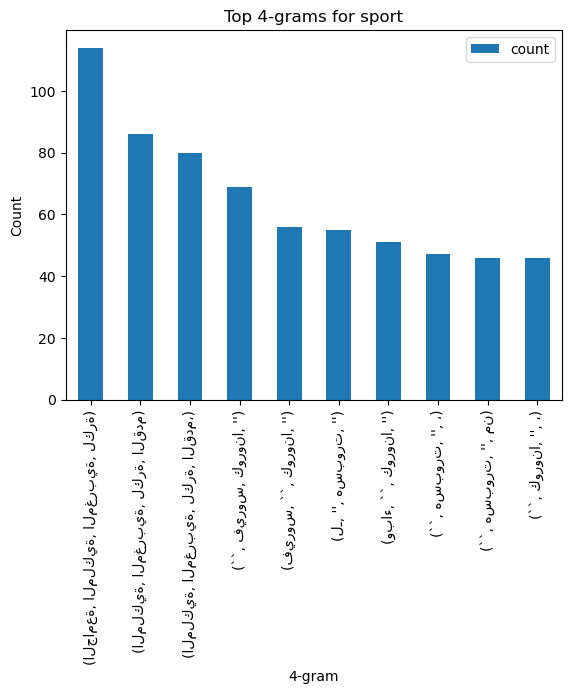

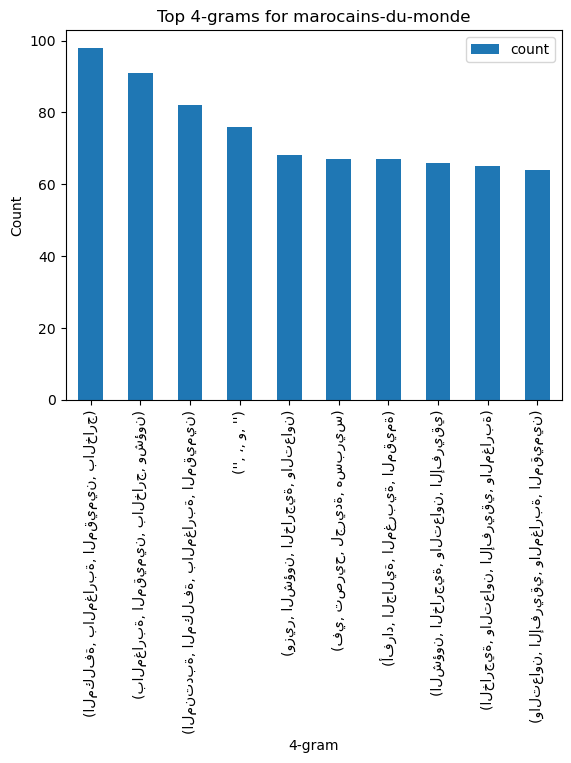

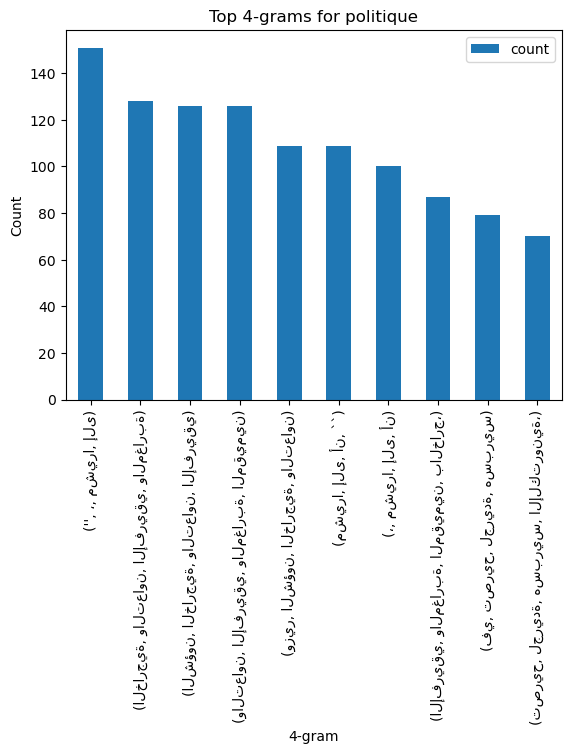

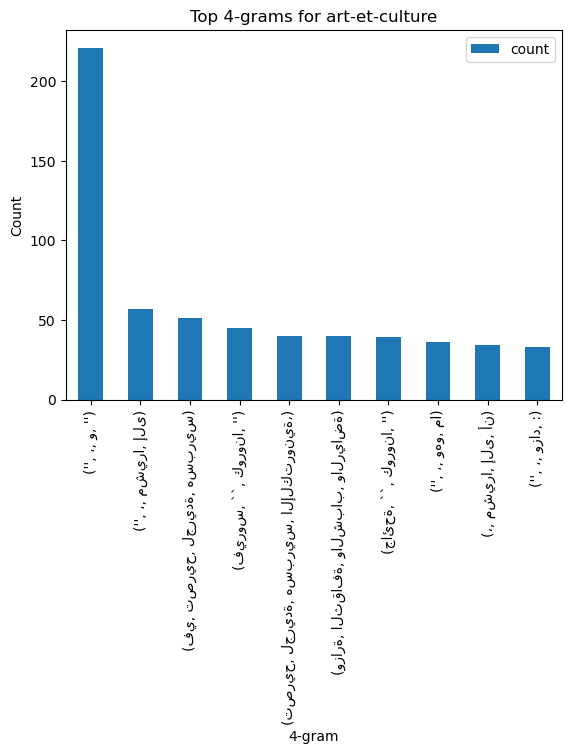

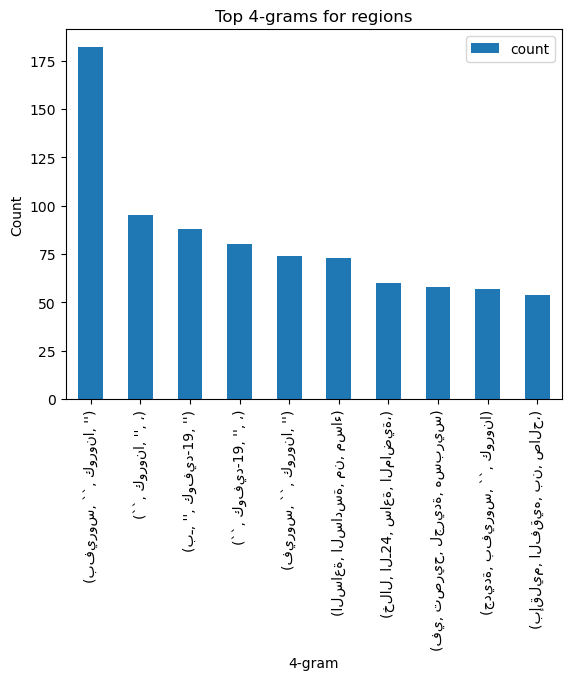

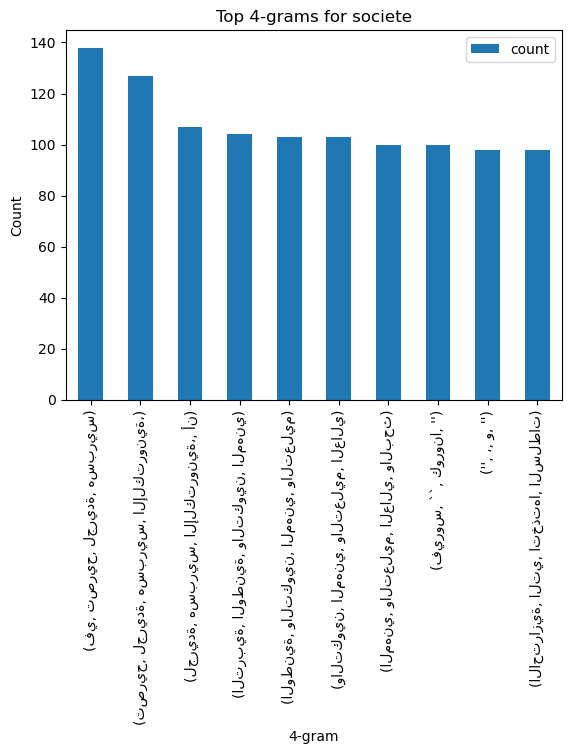

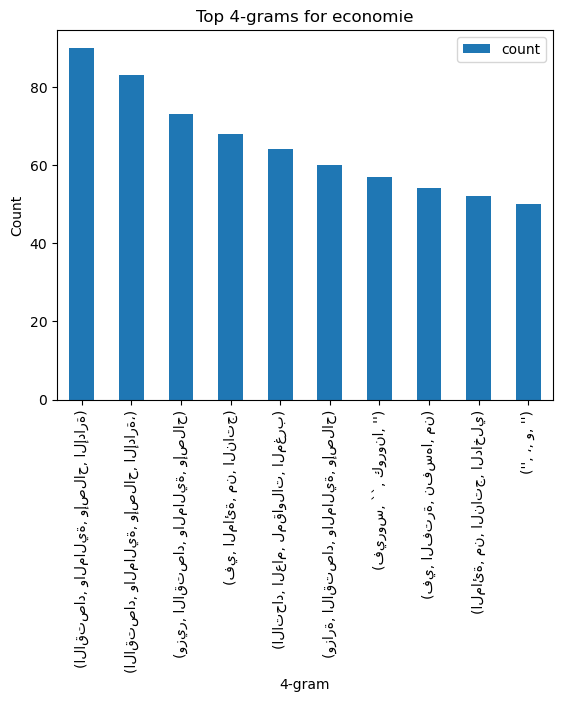

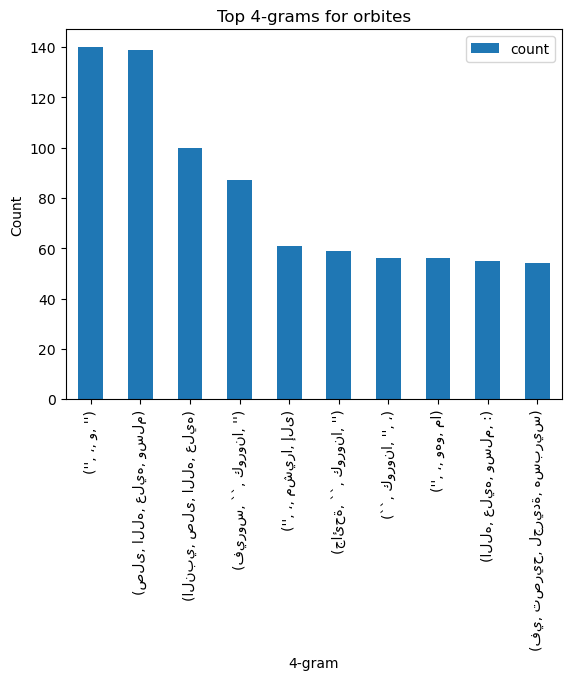

In [8]:
import nltk
from collections import Counter
def get_top_ngrams(category, n):
    # Get the articles for the category
    category_articles = df[df["topic"] == category]["story"].tolist()
    # Tokenize the text into words
    category_words = [nltk.word_tokenize(article) for article in category_articles]
    # Create n-grams from the words
    category_ngrams = [list(nltk.ngrams(words, n)) for words in category_words]
    # Flatten the list of n-grams
    all_ngrams = [gram for article in category_ngrams for gram in article]
    # Get the most frequent n-grams
    top_ngrams = Counter(all_ngrams).most_common(10)
    # Create a bar chart for the top n-grams
    top_ngrams_df = pd.DataFrame(top_ngrams, columns=[f"{n}-gram", "count"])
    top_ngrams_df.plot(kind="bar", x=f"{n}-gram", y="count")
    plt.title(f"Top {n}-grams for {category}")
    plt.xlabel(f"{n}-gram")
    plt.ylabel("Count")
    plt.show()

# Get the top 4-grams for each category
categories = df["topic"].unique().tolist()
for category in categories:
    get_top_ngrams(category, 4)

In [10]:
articles_text = data["story"].tolist()

# Tokenize the text into words
articles_words = [nltk.word_tokenize(article) for article in articles_text]

# Create 4-grams from the words
articles_4grams = [list(nltk.ngrams(words, 4)) for words in articles_words]

# Flatten the list of 4-grams
all_4grams = [gram for article in articles_4grams for gram in article]

# Get the most frequent 4-grams overall
top_10_4grams = Counter(all_4grams).most_common(10)
print("Top 10 4-grams overall:")
print(top_10_4grams)



Top 10 4-grams overall:
[(("''", '،', 'و', "''"), 829), (('``', 'أخبار', 'اليوم', "''"), 808), (('``', 'الأحداث', 'المغربية', "''"), 684), (('فيروس', '``', 'كورونا', "''"), 642), (('في', 'تصريح', 'لجريدة', 'هسبريس'), 619), (("''", '،', 'مشيرا', 'إلى'), 598), (('تصريح', 'لجريدة', 'هسبريس', 'الإلكترونية،'), 529), (('``', 'كورونا', "''", '،'), 482), (('``', 'المساء', "''", '،'), 476), (('،', 'مشيرا', 'إلى', 'أن'), 381)]


# Lengths of examples in words and letters

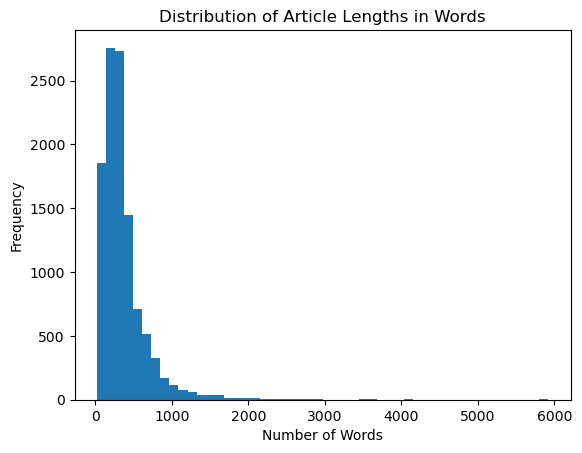

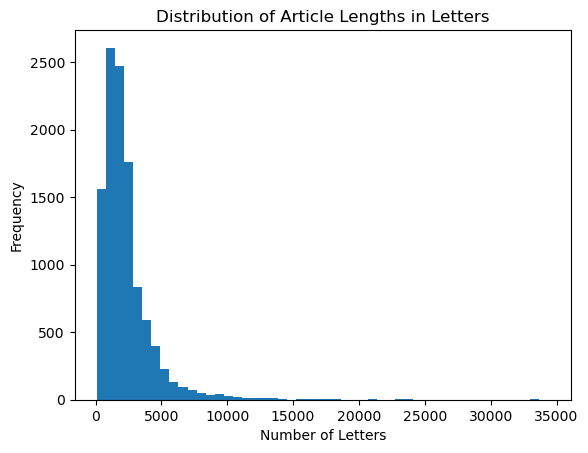

In [11]:
article_lengths_words = data["story"].apply(lambda x: len(x.split()))

# Get the length of each article in letters
article_lengths_letters = data["story"].apply(lambda x: len(x))

# Create a histogram for the length of articles in words
plt.hist(article_lengths_words, bins=50)
plt.title("Distribution of Article Lengths in Words")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Create a histogram for the length of articles in letters
plt.hist(article_lengths_letters, bins=50)
plt.title("Distribution of Article Lengths in Letters")
plt.xlabel("Number of Letters")
plt.ylabel("Frequency")
plt.show()

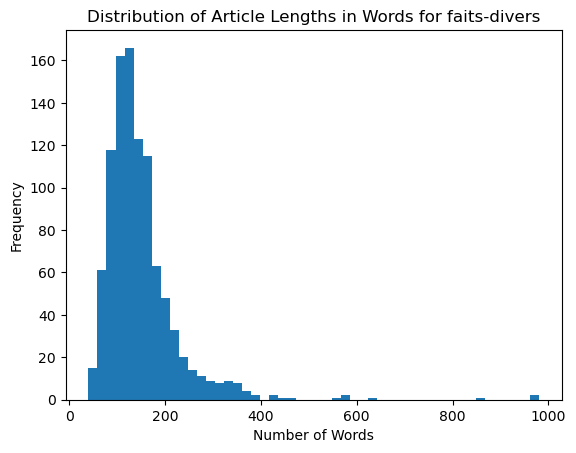

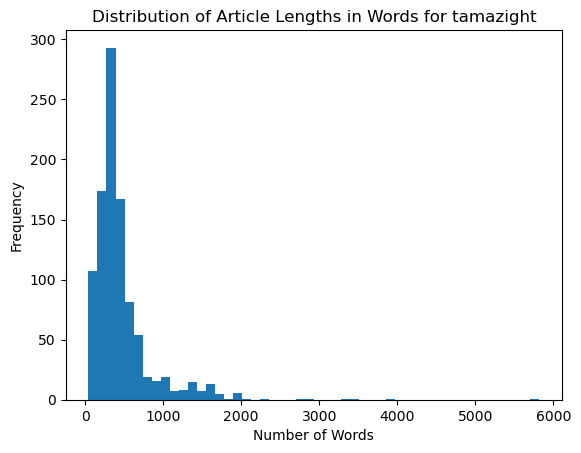

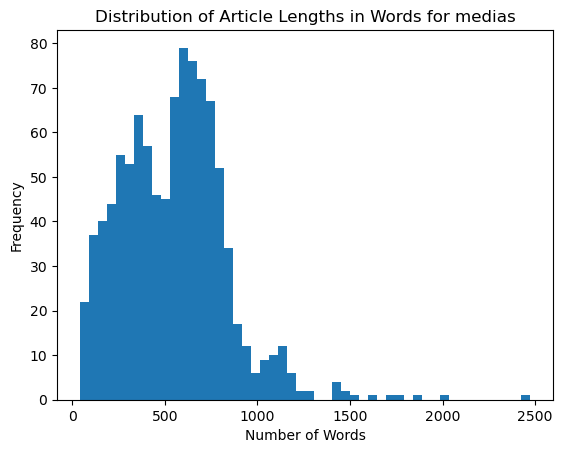

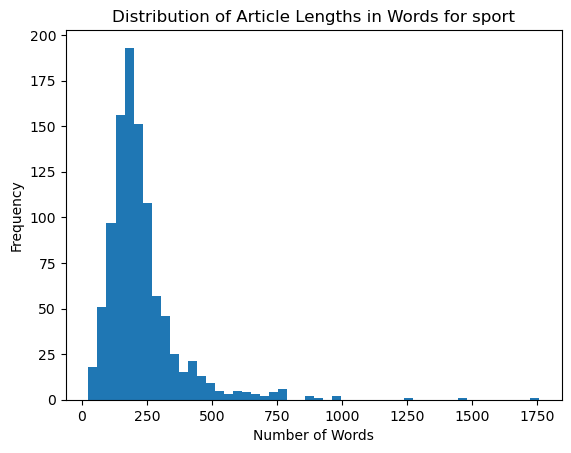

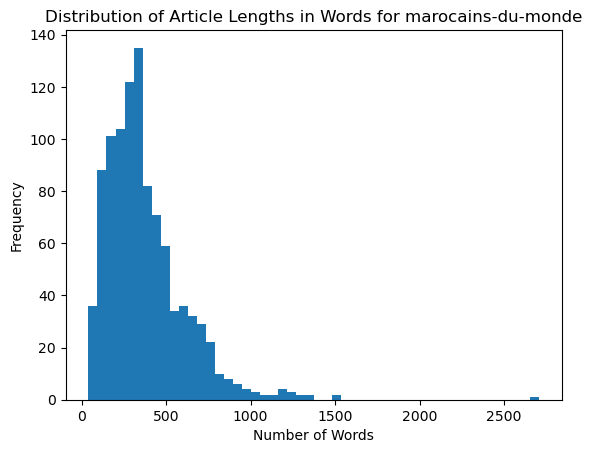

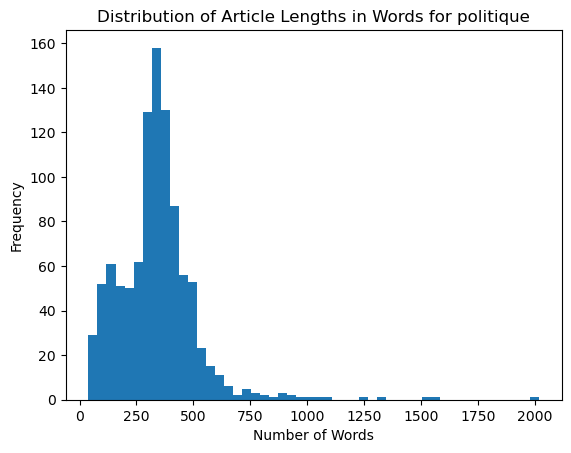

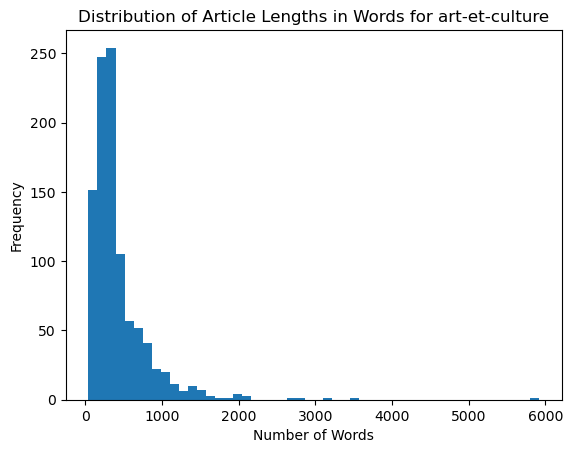

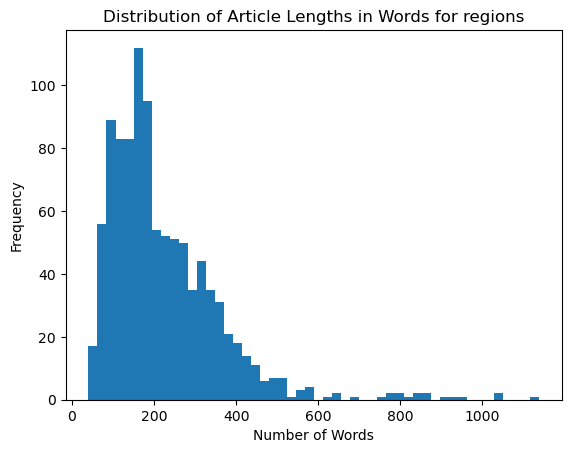

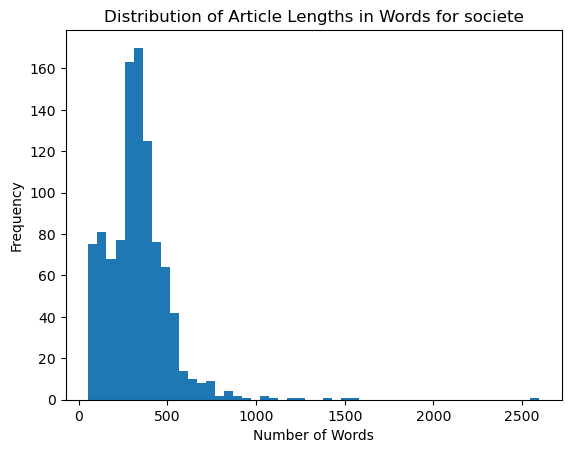

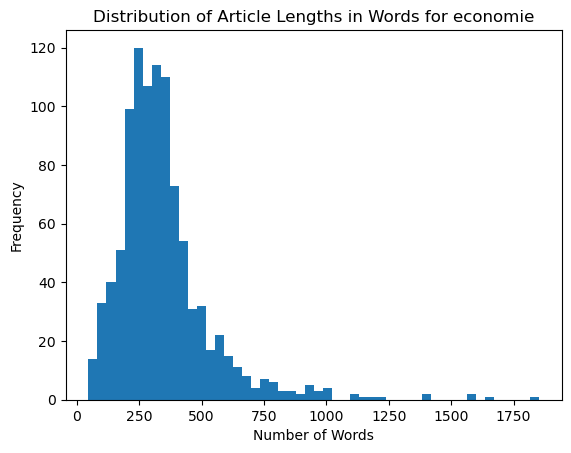

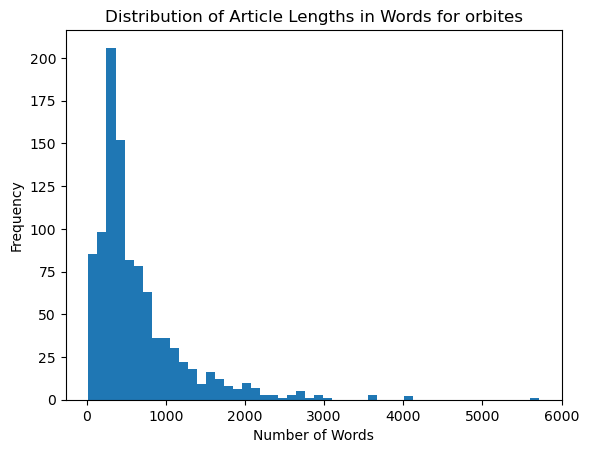

In [13]:
article_lengths_by_class = {}
for category in data["topic"].unique():
    category_articles = data[data["topic"] == category]["story"]
    category_article_lengths = category_articles.apply(lambda x: len(x.split()))
    article_lengths_by_class[category] = category_article_lengths

# Create a histogram for the length of articles in words for each class
for category in article_lengths_by_class:
    plt.hist(article_lengths_by_class[category], bins=50)
    plt.title(f"Distribution of Article Lengths in Words for {category}")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()